In [3]:
import CIE
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier')
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
HOC = ml.open_material('OC_HRI_LENS', 'Material')
OC = ml.open_material('OC_LENS', 'Material')

wl = np.linspace(400, 700, 301)

hypo_bri = lambda th: tm.Design(
    [air, SiN, SiO2, HOC, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2]-1200, th[3], 1200, 150, th[4], th[5], None]
).reflectance(wl)

hypo_bri2 = lambda th: tm.Design(
    [air,  SiN, SiO2, HOC, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], 1000, 150, th[4], th[5], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air,  SiN, SiO2,HOC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air,   SiN, SiO2,HOC,SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl)

In [4]:
m1 = [27.55518851,9.28833535,2350.14320373,31.18399857,32.39091331,9.02913602]
m2 = [0,0,1824.14320373,31.18399857,32.39091331,9.02913602]
m3 = [0,0,0,31.18399857,32.39091331,9.02913602]

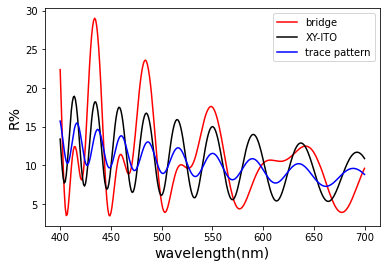

bridge: 10.87480840079899
xy-ITO: 10.709665417617435
pattern: 10.275148960759067
delta_d_t: 2.048818418687788
delta_d_b: 4.023896350963273
bridge: (39.022832004658326, -1.0885417105581385, -8.497577226061237)
xy-ITO: (38.5063166131729, -1.1925151658152, -5.833377934798811)
pattern: (37.67168273641556, -0.8801690140537999, -5.995407949772447)


In [6]:
tk = m1

plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
plt.savefig('LENS_rev2_simulation_OC')
#plt.savefig('LENS_rev2_simulation2')
#plt.savefig('LENS_rev2_simulation3')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))
print('bridge:',CIE.Lab(hypo_bri(tk)))
print('xy-ITO:',CIE.Lab(hypo_dia(tk)))
print('pattern:',CIE.Lab(hypo_tra(tk)))

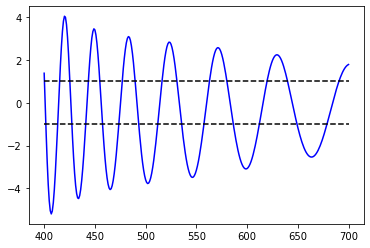

In [24]:
plt.plot(wl, 100*hypo_tra(tk)-100*hypo_dia(tk), '-b')
#plt.plot(wl, 100*hypo_tra(tk2)-100*hypo_dia(tk2), '-b')
#plt.plot(wl, 100*hypo_tra(tk3)-100*hypo_dia(tk3), '-b')
plt.plot(wl, -np.ones(np.size(wl)),'--k')
plt.plot(wl, np.ones(np.size(wl)),'--k')
#plt.savefig('LENS_rev2_sim_delta_d_t.png')
#plt.savefig('LENS_rev2_sim2_delta_d_t.png')
#plt.savefig('LENS_rev2_sim3_delta_d_t.png')
plt.show()

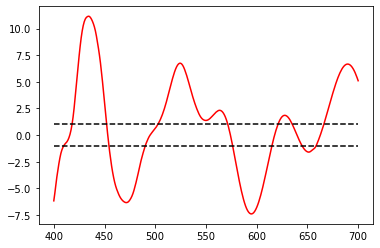

In [25]:
plt.plot(wl, 100*hypo_bri(tk)-100*hypo_dia(tk), '-r')
#plt.plot(wl, 100*hypo_bri(tk2)-100*hypo_dia(tk2), '-r')
#plt.plot(wl, 100*hypo_bri2(tk3)-100*hypo_dia(tk3), '-r')
plt.plot(wl, -np.ones(np.size(wl)),'--k')
plt.plot(wl, np.ones(np.size(wl)),'--k')
#plt.savefig('LENS_rev2_sim_delta_d_b.png')
#plt.savefig('LENS_rev2_sim2_delta_d_b.png')
#plt.savefig('LENS_rev2_sim3_delta_d_b.png')
plt.show()